In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import requests
from collections import Counter as C 

# Explore Dataset

In [2]:
gt = pd.read_csv("./Speeches.csv", sep=';',encoding = 'utf-8')
gt.head(5)

,Title,Event,Location,Date,Link Video,Trascript from,Script
0,Our Lives Are In Your Hands,Climate Strike Concert,Stockholm,"September 8,2018",https://www.youtube.com/watch?v=SrGp56ViaJs,https://medium.com/wedonthavetime/greta-thunbe...,"Last summer, climate scientist Johan Rockström..."
1,Almost Everything is Black and White,Extinction Rebellion Rally,London,"October 31,2018",https://www.youtube.com/watch?v=H8prVarP-rQ&t=30s,https://medium.com/wedonthavetime/the-rebellio...,"When I was about eight years old, I first hear..."
2,Save the World by Changing the Rules,School strike for climate,Stockholm,"November 24, 2018",https://www.youtube.com/watch?v=EAmmUIEsN9A,https://fridaysforfuture.org/what-we-do/activi...,"When I was about eight years old,\r\nI first h..."
3,Our Political Leaders Have Failed Us,UN Climate Conference,Katowice,"December 3, 2018",https://www.youtube.com/watch?v=F7NEcbPSak4,https://fridaysforfuture.org/what-we-do/activi...,before I start I just want to thank you\r\nAnt...
4,Unpopular,COP24 Speech,Katowice,"December 12, 2018",https://www.youtube.com/watch?v=CcQp_l7WqAk&t=46s,https://fridaysforfuture.org/what-we-do/activi...,My name is Greta Thunberg. I am 15 years old a...


In [3]:
gt.tail(4)

,Title,Event,Location,Date,Link Video,Trascript from,Script
12,We are the Change and Change is Coming,Global Climate Strike,Montreal,"September 27, 2019",https://www.youtube.com/watch?v=ihNvdY4INxk,https://www.environmentshow.com/greta-thunberg...,Hello Montreal!\r\nYour are a nation that is a...
13,Remember the Facts,COP25 United Nations Climate Conference,Madrid,"December 11, 2019",https://www.youtube.com/watch?v=r4_SS3cOJrw,https://www.rev.com/blog/transcripts/greta-thu...,A year and a half ago. I didn't speak to anyon...
14,We are telling you to act as if you loved your...,World Economic Forum,Davos,"January 21, 2020",https://www.youtube.com/watch?v=9zn1UI6wx0Q,https://www.rev.com/blog/transcripts/greta-thu...,One year ago I came to Davos and told you that...
15,You Cannot Make Deals with Physics,European Parliament,Brussels,"March 4, 2020",https://www.youtube.com/watch?v=ztQzW4qfKEs,https://www.rev.com/blog/transcripts/greta-thu...,my name is greta thunberg. I am a climate acti...


In [4]:
gt.shape

(16, 7)

In [5]:
gt.columns

Index(['Title', 'Event', 'Location', 'Date', 'Link Video', 'Trascript from',
       'Script'],
      dtype='object')

In [6]:
gt.dtypes

Title             object
Event             object
Location          object
Date              object
Link Video        object
Trascript from    object
Script            object
dtype: object

In [7]:
gt.info

<bound method DataFrame.info of                                                 Title  \
0                        Our Lives Are In Your Hands    
1                Almost Everything is Black and White   
2                Save the World by Changing the Rules   
3                Our Political Leaders Have Failed Us   
4                                           Unpopular   
5                                Our House is On Fire   
6   You are Acting Like Spoiled Irresponsible Chil...   
7                                     A Strange World   
8                                  Cathedral Thinking   
9             You Can’t Simply Make Up Your Own Facts   
10  Wherever I Go I Seem to be Surrounded by Fairy...   
11                             The World is Waking Up   
12             We are the Change and Change is Coming   
13                                 Remember the Facts   
14  We are telling you to act as if you loved your...   
15                 You Cannot Make Deals with Physics   

# Data Cleaning

In [2]:
import nltk 
import string
import re
from nltk.corpus import stopwords

In [9]:
stopword = stopwords.words('english')
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
# Include more Words

In [10]:
stopword.extend(["like","amp","say","get","one","still","even","u"])

In [11]:
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

gt["Script_punct"] = gt["Script"].apply(lambda x: remove_punct(x))
gt.head(3)

,Title,Event,Location,Date,Link Video,Trascript from,Script,Script_punct
0,Our Lives Are In Your Hands,Climate Strike Concert,Stockholm,"September 8,2018",https://www.youtube.com/watch?v=SrGp56ViaJs,https://medium.com/wedonthavetime/greta-thunbe...,"Last summer, climate scientist Johan Rockström...",Last summer climate scientist Johan Rockström ...
1,Almost Everything is Black and White,Extinction Rebellion Rally,London,"October 31,2018",https://www.youtube.com/watch?v=H8prVarP-rQ&t=30s,https://medium.com/wedonthavetime/the-rebellio...,"When I was about eight years old, I first hear...",When I was about eight years old I first heard...
2,Save the World by Changing the Rules,School strike for climate,Stockholm,"November 24, 2018",https://www.youtube.com/watch?v=EAmmUIEsN9A,https://fridaysforfuture.org/what-we-do/activi...,"When I was about eight years old,\r\nI first h...",When I was about eight years old\r\nI first he...


# Number of words per Speech without string.puntuation 

In [14]:
gt['Num-Words'] = gt['Script_punct'].str.count(' ') + 1
gt.tail(4)

,Title,Event,Location,Date,Link Video,Trascript from,Script,Script_punct,Num-Words
12,We are the Change and Change is Coming,Global Climate Strike,Montreal,"September 27, 2019",https://www.youtube.com/watch?v=ihNvdY4INxk,https://www.environmentshow.com/greta-thunberg...,Hello Montreal!\r\nYour are a nation that is a...,Hello Montreal\r\nYour are a nation that is al...,769
13,Remember the Facts,COP25 United Nations Climate Conference,Madrid,"December 11, 2019",https://www.youtube.com/watch?v=r4_SS3cOJrw,https://www.rev.com/blog/transcripts/greta-thu...,A year and a half ago. I didn't speak to anyon...,A year and a half ago I didnt speak to anyone ...,516
14,We are telling you to act as if you loved your...,World Economic Forum,Davos,"January 21, 2020",https://www.youtube.com/watch?v=9zn1UI6wx0Q,https://www.rev.com/blog/transcripts/greta-thu...,One year ago I came to Davos and told you that...,One year ago I came to Davos and told you that...,917
15,You Cannot Make Deals with Physics,European Parliament,Brussels,"March 4, 2020",https://www.youtube.com/watch?v=ztQzW4qfKEs,https://www.rev.com/blog/transcripts/greta-thu...,my name is greta thunberg. I am a climate acti...,my name is greta thunberg I am a climate activ...,845


In [15]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

gt['Script_tokenized'] = gt['Script_punct'].apply(lambda x: tokenization(x.lower()))
gt.head(3)

,Title,Event,Location,Date,Link Video,Trascript from,Script,Script_punct,Num-Words,Script_tokenized
0,Our Lives Are In Your Hands,Climate Strike Concert,Stockholm,"September 8,2018",https://www.youtube.com/watch?v=SrGp56ViaJs,https://medium.com/wedonthavetime/greta-thunbe...,"Last summer, climate scientist Johan Rockström...",Last summer climate scientist Johan Rockström ...,542,"[last, summer, climate, scientist, johan, rock..."
1,Almost Everything is Black and White,Extinction Rebellion Rally,London,"October 31,2018",https://www.youtube.com/watch?v=H8prVarP-rQ&t=30s,https://medium.com/wedonthavetime/the-rebellio...,"When I was about eight years old, I first hear...",When I was about eight years old I first heard...,975,"[when, i, was, about, eight, years, old, i, fi..."
2,Save the World by Changing the Rules,School strike for climate,Stockholm,"November 24, 2018",https://www.youtube.com/watch?v=EAmmUIEsN9A,https://fridaysforfuture.org/what-we-do/activi...,"When I was about eight years old,\r\nI first h...",When I was about eight years old\r\nI first he...,1250,"[when, i, was, about, eight, years, old, i, fi..."


In [16]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
gt['Script_nonstop'] = gt['Script_tokenized'].apply(lambda x: remove_stopwords(x))
gt.head(3)

,Title,Event,Location,Date,Link Video,Trascript from,Script,Script_punct,Num-Words,Script_tokenized,Script_nonstop
0,Our Lives Are In Your Hands,Climate Strike Concert,Stockholm,"September 8,2018",https://www.youtube.com/watch?v=SrGp56ViaJs,https://medium.com/wedonthavetime/greta-thunbe...,"Last summer, climate scientist Johan Rockström...",Last summer climate scientist Johan Rockström ...,542,"[last, summer, climate, scientist, johan, rock...","[last, summer, climate, scientist, johan, rock..."
1,Almost Everything is Black and White,Extinction Rebellion Rally,London,"October 31,2018",https://www.youtube.com/watch?v=H8prVarP-rQ&t=30s,https://medium.com/wedonthavetime/the-rebellio...,"When I was about eight years old, I first hear...",When I was about eight years old I first heard...,975,"[when, i, was, about, eight, years, old, i, fi...","[eight, years, old, first, heard, something, c..."
2,Save the World by Changing the Rules,School strike for climate,Stockholm,"November 24, 2018",https://www.youtube.com/watch?v=EAmmUIEsN9A,https://fridaysforfuture.org/what-we-do/activi...,"When I was about eight years old,\r\nI first h...",When I was about eight years old\r\nI first he...,1250,"[when, i, was, about, eight, years, old, i, fi...","[eight, years, old, first, heard, something, c..."


In [17]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

gt['Script_stemmed'] = gt['Script_nonstop'].apply(lambda x: stemming(x))
gt.head(3)

,Title,Event,Location,Date,Link Video,Trascript from,Script,Script_punct,Num-Words,Script_tokenized,Script_nonstop,Script_stemmed
0,Our Lives Are In Your Hands,Climate Strike Concert,Stockholm,"September 8,2018",https://www.youtube.com/watch?v=SrGp56ViaJs,https://medium.com/wedonthavetime/greta-thunbe...,"Last summer, climate scientist Johan Rockström...",Last summer climate scientist Johan Rockström ...,542,"[last, summer, climate, scientist, johan, rock...","[last, summer, climate, scientist, johan, rock...","[last, summer, climat, scientist, johan, rocks..."
1,Almost Everything is Black and White,Extinction Rebellion Rally,London,"October 31,2018",https://www.youtube.com/watch?v=H8prVarP-rQ&t=30s,https://medium.com/wedonthavetime/the-rebellio...,"When I was about eight years old, I first hear...",When I was about eight years old I first heard...,975,"[when, i, was, about, eight, years, old, i, fi...","[eight, years, old, first, heard, something, c...","[eight, year, old, first, heard, someth, call,..."
2,Save the World by Changing the Rules,School strike for climate,Stockholm,"November 24, 2018",https://www.youtube.com/watch?v=EAmmUIEsN9A,https://fridaysforfuture.org/what-we-do/activi...,"When I was about eight years old,\r\nI first h...",When I was about eight years old\r\nI first he...,1250,"[when, i, was, about, eight, years, old, i, fi...","[eight, years, old, first, heard, something, c...","[eight, year, old, first, heard, someth, call,..."


In [18]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

gt['Script_lemmatized'] = gt['Script_nonstop'].apply(lambda x: lemmatizer(x))
gt.head(3)

,Title,Event,Location,Date,Link Video,Trascript from,Script,Script_punct,Num-Words,Script_tokenized,Script_nonstop,Script_stemmed,Script_lemmatized
0,Our Lives Are In Your Hands,Climate Strike Concert,Stockholm,"September 8,2018",https://www.youtube.com/watch?v=SrGp56ViaJs,https://medium.com/wedonthavetime/greta-thunbe...,"Last summer, climate scientist Johan Rockström...",Last summer climate scientist Johan Rockström ...,542,"[last, summer, climate, scientist, johan, rock...","[last, summer, climate, scientist, johan, rock...","[last, summer, climat, scientist, johan, rocks...","[last, summer, climate, scientist, johan, rock..."
1,Almost Everything is Black and White,Extinction Rebellion Rally,London,"October 31,2018",https://www.youtube.com/watch?v=H8prVarP-rQ&t=30s,https://medium.com/wedonthavetime/the-rebellio...,"When I was about eight years old, I first hear...",When I was about eight years old I first heard...,975,"[when, i, was, about, eight, years, old, i, fi...","[eight, years, old, first, heard, something, c...","[eight, year, old, first, heard, someth, call,...","[eight, year, old, first, heard, something, ca..."
2,Save the World by Changing the Rules,School strike for climate,Stockholm,"November 24, 2018",https://www.youtube.com/watch?v=EAmmUIEsN9A,https://fridaysforfuture.org/what-we-do/activi...,"When I was about eight years old,\r\nI first h...",When I was about eight years old\r\nI first he...,1250,"[when, i, was, about, eight, years, old, i, fi...","[eight, years, old, first, heard, something, c...","[eight, year, old, first, heard, someth, call,...","[eight, year, old, first, heard, something, ca..."


# Count the most repeated words

In [19]:
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image
import matplotlib.pyplot as plt

In [20]:
count_words = gt['Script_stemmed'][:200000].dropna().to_list()

In [21]:
my_words =[]
for elem in count_words:
    my_words += elem
C(my_words).most_common(21)

[('climat', 100),
 ('peopl', 84),
 ('year', 60),
 ('chang', 60),
 ('need', 57),
 ('crisi', 57),
 ('emiss', 54),
 ('us', 51),
 ('world', 51),
 ('polit', 46),
 ('time', 45),
 ('futur', 43),
 ('today', 42),
 ('would', 39),
 ('school', 38),
 ('live', 38),
 ('children', 37),
 ('go', 36),
 ('dont', 36),
 ('start', 35),
 ('scienc', 35)]

In [22]:
common = C(my_words).most_common(21)
common

[('climat', 100),
 ('peopl', 84),
 ('year', 60),
 ('chang', 60),
 ('need', 57),
 ('crisi', 57),
 ('emiss', 54),
 ('us', 51),
 ('world', 51),
 ('polit', 46),
 ('time', 45),
 ('futur', 43),
 ('today', 42),
 ('would', 39),
 ('school', 38),
 ('live', 38),
 ('children', 37),
 ('go', 36),
 ('dont', 36),
 ('start', 35),
 ('scienc', 35)]

Text(0.5, 1.0, 'Word Count in Greta Thunberg Speeches(Stemmed)')

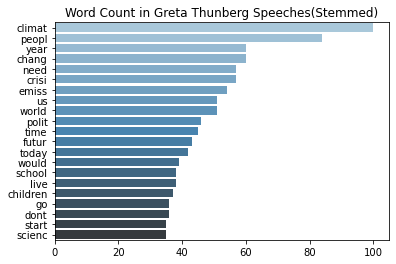

In [23]:
x, y= [], []
for word,count in common:
    if (word not in stopword):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x, palette="Blues_d")
plt.title('Word Count in Greta Thunberg Speeches(Stemmed)')

In [24]:
count_words2 = gt['Script_lemmatized'][:200000].dropna().to_list()

In [25]:
my_words2 =[]
for elem in count_words2:
    my_words2 += elem
C(my_words2).most_common(21)

[('climate', 100),
 ('people', 84),
 ('year', 60),
 ('crisis', 58),
 ('emission', 54),
 ('change', 53),
 ('u', 51),
 ('world', 51),
 ('need', 48),
 ('time', 45),
 ('future', 43),
 ('today', 42),
 ('child', 40),
 ('would', 39),
 ('school', 38),
 ('dont', 36),
 ('science', 35),
 ('degree', 33),
 ('everything', 32),
 ('fact', 32),
 ('leader', 30)]

In [26]:
common2 = C(my_words2).most_common(21)
common2

[('climate', 100),
 ('people', 84),
 ('year', 60),
 ('crisis', 58),
 ('emission', 54),
 ('change', 53),
 ('u', 51),
 ('world', 51),
 ('need', 48),
 ('time', 45),
 ('future', 43),
 ('today', 42),
 ('child', 40),
 ('would', 39),
 ('school', 38),
 ('dont', 36),
 ('science', 35),
 ('degree', 33),
 ('everything', 32),
 ('fact', 32),
 ('leader', 30)]

Text(0.5, 1.0, 'Word Count in Greta Thunberg Speeches(lemmatized)')

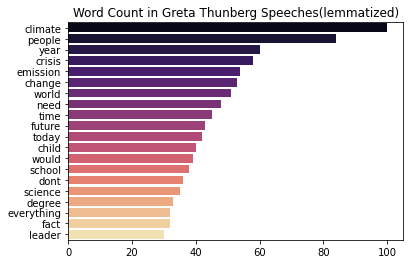

In [27]:
x, y= [], []
for word,count in common2:
    if (word not in stopword):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x, palette="magma")
plt.title("Word Count in Greta Thunberg Speeches(lemmatized)")

In [32]:
## https://matplotlib.org/stable/gallery/color/named_colors.html

# World Cloud

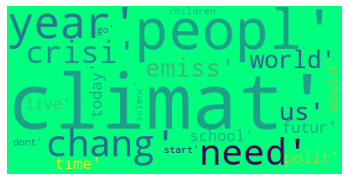

In [28]:
text = common

wordcloud = WordCloud(background_color="springgreen").generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

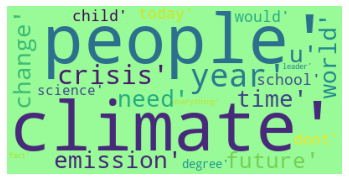

In [29]:
text2 = common2

wordcloud = WordCloud(background_color="palegreen").generate(str(text2))

plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

# Include the most repeated words in pictures

In [30]:
import numpy as np 
from os import path
from PIL import Image

In [31]:
leaf_mask = np.array(Image.open("leaf.png"))

In [32]:
str(text2)

"[('climate', 100), ('people', 84), ('year', 60), ('crisis', 58), ('emission', 54), ('change', 53), ('u', 51), ('world', 51), ('need', 48), ('time', 45), ('future', 43), ('today', 42), ('child', 40), ('would', 39), ('school', 38), ('dont', 36), ('science', 35), ('degree', 33), ('everything', 32), ('fact', 32), ('leader', 30)]"

In [33]:
wordcloud_leaf = WordCloud(stopwords=stopword, background_color="lightgreen",max_words=1000, 
                           mask=leaf_mask,contour_width=3, contour_color="steelblue")
wordcloud_leaf.generate(str(text2))

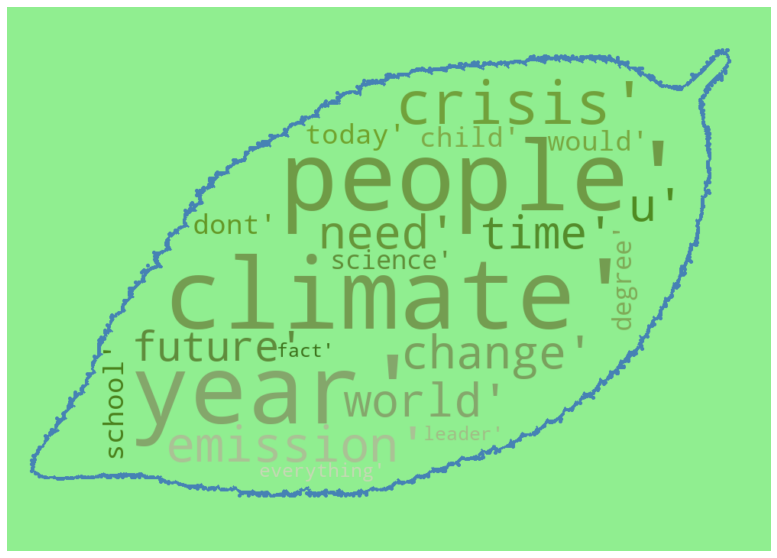

In [34]:
image_colors = ImageColorGenerator(leaf_mask)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud_leaf.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("leaf_words.png", format="png")

In [35]:
sun_mask = np.array(Image.open("sun.png"))

In [36]:
wordcloud_leaf = WordCloud(stopwords=stopword, background_color="skyblue",max_words=1000, 
                           mask=sun_mask,contour_width=3, contour_color="gold")
wordcloud_leaf.generate(str(text))

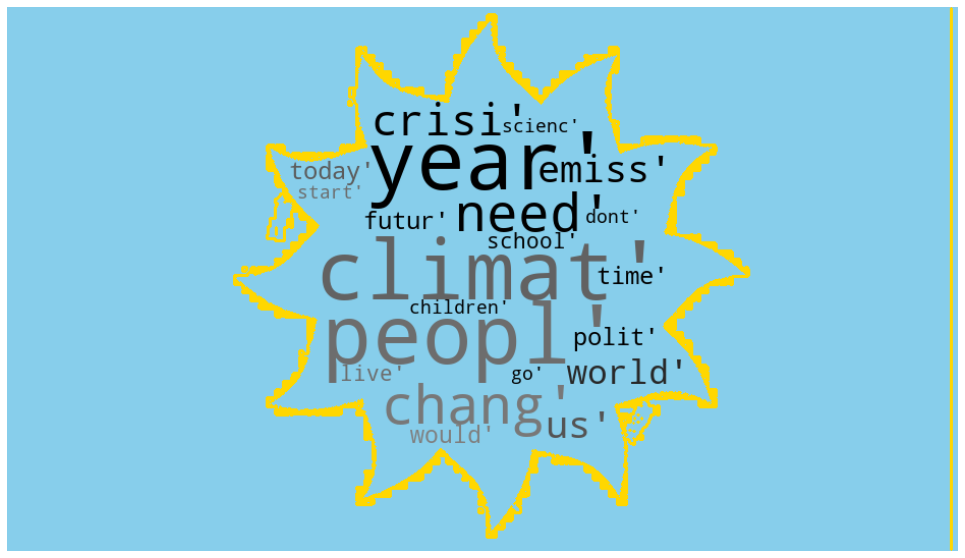

In [37]:
image_colors = ImageColorGenerator(sun_mask)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud_leaf.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("sun_words.png", format="png")

In [38]:
str(text)

"[('climat', 100), ('peopl', 84), ('year', 60), ('chang', 60), ('need', 57), ('crisi', 57), ('emiss', 54), ('us', 51), ('world', 51), ('polit', 46), ('time', 45), ('futur', 43), ('today', 42), ('would', 39), ('school', 38), ('live', 38), ('children', 37), ('go', 36), ('dont', 36), ('start', 35), ('scienc', 35)]"

In [39]:
gt.head(3)

,Title,Event,Location,Date,Link Video,Trascript from,Script,Script_punct,Num-Words,Script_tokenized,Script_nonstop,Script_stemmed,Script_lemmatized
0,Our Lives Are In Your Hands,Climate Strike Concert,Stockholm,"September 8,2018",https://www.youtube.com/watch?v=SrGp56ViaJs,https://medium.com/wedonthavetime/greta-thunbe...,"Last summer, climate scientist Johan Rockström...",Last summer climate scientist Johan Rockström ...,542,"[last, summer, climate, scientist, johan, rock...","[last, summer, climate, scientist, johan, rock...","[last, summer, climat, scientist, johan, rocks...","[last, summer, climate, scientist, johan, rock..."
1,Almost Everything is Black and White,Extinction Rebellion Rally,London,"October 31,2018",https://www.youtube.com/watch?v=H8prVarP-rQ&t=30s,https://medium.com/wedonthavetime/the-rebellio...,"When I was about eight years old, I first hear...",When I was about eight years old I first heard...,975,"[when, i, was, about, eight, years, old, i, fi...","[eight, years, old, first, heard, something, c...","[eight, year, old, first, heard, someth, call,...","[eight, year, old, first, heard, something, ca..."
2,Save the World by Changing the Rules,School strike for climate,Stockholm,"November 24, 2018",https://www.youtube.com/watch?v=EAmmUIEsN9A,https://fridaysforfuture.org/what-we-do/activi...,"When I was about eight years old,\r\nI first h...",When I was about eight years old\r\nI first he...,1250,"[when, i, was, about, eight, years, old, i, fi...","[eight, years, old, first, heard, something, c...","[eight, year, old, first, heard, someth, call,...","[eight, year, old, first, heard, something, ca..."


In [40]:
gt.to_csv("./greta.csv", sep=';', index = False, encoding = 'utf-8')

# Topic Modeling

In [3]:
import pandas as pd
import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess

import spacy
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)
from itertools import chain

C:\Users\ASUS\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [85]:
greta = pd.read_csv("./greta.csv", sep=';',encoding = 'utf-8')
greta.head(5)

,Title,Event,Location,Date,Link Video,Trascript from,Script,Script_punct,Num-Words,Script_tokenized,Script_nonstop,Script_stemmed,Script_lemmatized
0,Our Lives Are In Your Hands,Climate Strike Concert,Stockholm,"September 8,2018",https://www.youtube.com/watch?v=SrGp56ViaJs,https://medium.com/wedonthavetime/greta-thunbe...,"Last summer, climate scientist Johan Rockström...",Last summer climate scientist Johan Rockström ...,542,"['last', 'summer', 'climate', 'scientist', 'jo...","['last', 'summer', 'climate', 'scientist', 'jo...","['last', 'summer', 'climat', 'scientist', 'joh...","['last', 'summer', 'climate', 'scientist', 'jo..."
1,Almost Everything is Black and White,Extinction Rebellion Rally,London,"October 31,2018",https://www.youtube.com/watch?v=H8prVarP-rQ&t=30s,https://medium.com/wedonthavetime/the-rebellio...,"When I was about eight years old, I first hear...",When I was about eight years old I first heard...,975,"['when', 'i', 'was', 'about', 'eight', 'years'...","['eight', 'years', 'old', 'first', 'heard', 's...","['eight', 'year', 'old', 'first', 'heard', 'so...","['eight', 'year', 'old', 'first', 'heard', 'so..."
2,Save the World by Changing the Rules,School strike for climate,Stockholm,"November 24, 2018",https://www.youtube.com/watch?v=EAmmUIEsN9A,https://fridaysforfuture.org/what-we-do/activi...,"When I was about eight years old,\r\nI first h...",When I was about eight years old\r\nI first he...,1250,"['when', 'i', 'was', 'about', 'eight', 'years'...","['eight', 'years', 'old', 'first', 'heard', 's...","['eight', 'year', 'old', 'first', 'heard', 'so...","['eight', 'year', 'old', 'first', 'heard', 'so..."
3,Our Political Leaders Have Failed Us,UN Climate Conference,Katowice,"December 3, 2018",https://www.youtube.com/watch?v=F7NEcbPSak4,https://fridaysforfuture.org/what-we-do/activi...,before I start I just want to thank you\r\nAnt...,before I start I just want to thank you\r\nAnt...,489,"['before', 'i', 'start', 'i', 'just', 'want', ...","['start', 'want', 'thank', 'antonio', 'guterre...","['start', 'want', 'thank', 'antonio', 'guterr'...","['start', 'want', 'thank', 'antonio', 'guterre..."
4,Unpopular,COP24 Speech,Katowice,"December 12, 2018",https://www.youtube.com/watch?v=CcQp_l7WqAk&t=46s,https://fridaysforfuture.org/what-we-do/activi...,My name is Greta Thunberg. I am 15 years old a...,My name is Greta Thunberg I am years old and ...,425,"['my', 'name', 'is', 'greta', 'thunberg', 'i',...","['name', 'greta', 'thunberg', 'years', 'old', ...","['name', 'greta', 'thunberg', 'year', 'old', '...","['name', 'greta', 'thunberg', 'year', 'old', '..."


In [86]:
greta.columns

Index(['Title', 'Event', 'Location', 'Date', 'Link Video', 'Trascript from',
       'Script', 'Script_punct', 'Num-Words', 'Script_tokenized',
       'Script_nonstop', 'Script_stemmed', 'Script_lemmatized'],
      dtype='object')

In [87]:
to_clean = greta[['Title', 'Event', 'Location', 'Date', 'Num-Words','Script']]
to_clean

,Title,Event,Location,Date,Num-Words,Script
0,Our Lives Are In Your Hands,Climate Strike Concert,Stockholm,"September 8,2018",542,"Last summer, climate scientist Johan Rockström..."
1,Almost Everything is Black and White,Extinction Rebellion Rally,London,"October 31,2018",975,"When I was about eight years old, I first hear..."
2,Save the World by Changing the Rules,School strike for climate,Stockholm,"November 24, 2018",1250,"When I was about eight years old,\r\nI first h..."
3,Our Political Leaders Have Failed Us,UN Climate Conference,Katowice,"December 3, 2018",489,before I start I just want to thank you\r\nAnt...
4,Unpopular,COP24 Speech,Katowice,"December 12, 2018",425,My name is Greta Thunberg. I am 15 years old a...
5,Our House is On Fire,World Economic Forum,Davos,"January 25, 2019",697,"our house is on fire. I am here to say, our ho..."
6,You are Acting Like Spoiled Irresponsible Chil...,European Economic and Social Committee,Brussels,"February 21, 2019",1054,"My name is Greta Thunberg, I am a climate acti..."
7,A Strange World,Goldene Kamera,Berlin,"March 30, 2019",435,thank you. I want to dedicate this prize to th...
8,Cathedral Thinking,European Parliament,Strasbourg,"April 16, 2019",1295,My name is Greta Thunberg. I am 16 years old. ...
9,You Can’t Simply Make Up Your Own Facts,Frech National Assembly,Paris,"July 23, 2019",1349,"je m'appelle greta thunber, merci beaucoup pou..."


In [45]:
stopword = stopwords.words('english')
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [46]:
stopword.extend(["like","amp","say","get","one","still","even","u","maybe","don’t"])

In [47]:
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [48]:
stop = set(stopword)
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(Script):
    stop_free = ' '.join([word for word in Script.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

In [49]:
to_clean["Script_clean"]=to_clean["Script"].apply(clean)

<ipython-input-49-9af9f9453f46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_clean["Script_clean"]=to_clean["Script"].apply(clean)


In [50]:
to_clean.head(3)

,Title,Event,Location,Date,Script,Script_clean
0,Our Lives Are In Your Hands,Climate Strike Concert,Stockholm,"September 8,2018","Last summer, climate scientist Johan Rockström...","[last, summer, climate, scientist, johan, rock..."
1,Almost Everything is Black and White,Extinction Rebellion Rally,London,"October 31,2018","When I was about eight years old, I first hear...","[eight, year, old, first, heard, something, ca..."
2,Save the World by Changing the Rules,School strike for climate,Stockholm,"November 24, 2018","When I was about eight years old,\r\nI first h...","[eight, year, old, first, heard, something, ca..."


In [51]:
dictionary = corpora.Dictionary(to_clean["Script_clean"])
print(dictionary.num_nnz)

4489


In [52]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in to_clean["Script_clean"]]
print(len(doc_term_matrix))

16


In [53]:
lda = gensim.models.ldamodel.LdaModel

In [54]:
num_topics = 1
%time ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

Wall time: 792 ms


In [55]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.012*"climate" + 0.010*"people" + 0.007*"year" + 0.007*"crisis" + 0.007*"emission" + 0.006*"change" + 0.006*"u" + 0.006*"world" + 0.006*"need" + 0.005*"time"')]

In [58]:
num_topics = 2
%time ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=150,minimum_probability=0)

Wall time: 3.98 s


In [59]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.013*"climate" + 0.010*"people" + 0.008*"emission" + 0.008*"year" + 0.008*"crisis" + 0.008*"world" + 0.006*"u" + 0.006*"today" + 0.006*"need" + 0.005*"school"'),
 (1,
  '0.011*"climate" + 0.010*"people" + 0.008*"change" + 0.006*"time" + 0.006*"year" + 0.006*"u" + 0.006*"crisis" + 0.006*"need" + 0.005*"want" + 0.005*"house"')]

In [60]:
lda_corpus = ldamodel[doc_term_matrix]

In [61]:
[doc for doc in lda_corpus]

[[(0, 0.006606335), (1, 0.99339366)],
 [(0, 0.99852717), (1, 0.0014727976)],
 [(0, 0.99891764), (1, 0.0010823641)],
 [(0, 0.9970112), (1, 0.0029888214)],
 [(0, 0.9950612), (1, 0.0049388073)],
 [(0, 0.0024551267), (1, 0.9975449)],
 [(0, 0.0015233058), (1, 0.9984767)],
 [(0, 0.9963711), (1, 0.0036289073)],
 [(0, 0.0012138087), (1, 0.99878615)],
 [(0, 0.0013450913), (1, 0.99865496)],
 [(0, 0.9988379), (1, 0.0011621438)],
 [(0, 0.9967731), (1, 0.0032268672)],
 [(0, 0.99755794), (1, 0.0024420358)],
 [(0, 0.0035655457), (1, 0.9964345)],
 [(0, 0.99835134), (1, 0.0016486873)],
 [(0, 0.9981632), (1, 0.0018367565)]]

In [62]:
scores = list(chain(*[[score for Title_id,score in Title] \
                     for Title in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)
print(threshold)

0.49999999700230546


In [63]:
cluster1 = [j for i,j in zip(lda_corpus,to_clean.index) if i[0][1] > threshold]
cluster2 = [j for i,j in zip(lda_corpus,to_clean.index) if i[1][1] > threshold]
print(len(cluster1))
print(len(cluster2))

10
6


# Topic "1"

In [64]:
to_clean.iloc[cluster1]

,Title,Event,Location,Date,Script,Script_clean
1,Almost Everything is Black and White,Extinction Rebellion Rally,London,"October 31,2018","When I was about eight years old, I first hear...","[eight, year, old, first, heard, something, ca..."
2,Save the World by Changing the Rules,School strike for climate,Stockholm,"November 24, 2018","When I was about eight years old,\r\nI first h...","[eight, year, old, first, heard, something, ca..."
3,Our Political Leaders Have Failed Us,UN Climate Conference,Katowice,"December 3, 2018",before I start I just want to thank you\r\nAnt...,"[start, want, thank, antonio, guterres, speaki..."
4,Unpopular,COP24 Speech,Katowice,"December 12, 2018",My name is Greta Thunberg. I am 15 years old a...,"[name, greta, thunberg, 15, year, old, im, swe..."
7,A Strange World,Goldene Kamera,Berlin,"March 30, 2019",thank you. I want to dedicate this prize to th...,"[thank, you, want, dedicate, prize, protecting..."
10,Wherever I Go I Seem to be Surrounded by Fairy...,U.S. Congress,Washington,"September 18, 2019","My name is Greta Thunberg, I am 16 years old a...","[name, greta, thunberg, 16, year, old, i’m, sw..."
11,The World is Waking Up,Speech At The U.N. Climate Action Summit 2019,New York City,"September 23, 2019",My message is that we'll be watching you.\nThi...,"[message, well, watching, you, wrong, here, ba..."
12,We are the Change and Change is Coming,Global Climate Strike,Montreal,"September 27, 2019",Hello Montreal!\r\nYour are a nation that is a...,"[hello, montreal, nation, allegedly, climate, ..."
14,We are telling you to act as if you loved your...,World Economic Forum,Davos,"January 21, 2020",One year ago I came to Davos and told you that...,"[year, ago, came, davos, told, house, fire, sa..."
15,You Cannot Make Deals with Physics,European Parliament,Brussels,"March 4, 2020",my name is greta thunberg. I am a climate acti...,"[name, greta, thunberg, climate, activist, par..."


## Topic "2"

In [65]:
to_clean.iloc[cluster2]

,Title,Event,Location,Date,Script,Script_clean
0,Our Lives Are In Your Hands,Climate Strike Concert,Stockholm,"September 8,2018","Last summer, climate scientist Johan Rockström...","[last, summer, climate, scientist, johan, rock..."
5,Our House is On Fire,World Economic Forum,Davos,"January 25, 2019","our house is on fire. I am here to say, our ho...","[house, fire, say, house, fire, according, ipc..."
6,You are Acting Like Spoiled Irresponsible Chil...,European Economic and Social Committee,Brussels,"February 21, 2019","My name is Greta Thunberg, I am a climate acti...","[name, greta, thunberg, climate, activist, swe..."
8,Cathedral Thinking,European Parliament,Strasbourg,"April 16, 2019",My name is Greta Thunberg. I am 16 years old. ...,"[name, greta, thunberg, 16, year, old, come, s..."
9,You Can’t Simply Make Up Your Own Facts,Frech National Assembly,Paris,"July 23, 2019","je m'appelle greta thunber, merci beaucoup pou...","[je, mappelle, greta, thunber, merci, beaucoup..."
13,Remember the Facts,COP25 United Nations Climate Conference,Madrid,"December 11, 2019",A year and a half ago. I didn't speak to anyon...,"[year, half, ago, speak, anyone, unless, reall..."


# Sentiment of Speeches

In [66]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [67]:
greta.head(2)

,Title,Event,Location,Date,Link Video,Trascript from,Script,Script_punct,Num-Words,Script_tokenized,Script_nonstop,Script_stemmed,Script_lemmatized
0,Our Lives Are In Your Hands,Climate Strike Concert,Stockholm,"September 8,2018",https://www.youtube.com/watch?v=SrGp56ViaJs,https://medium.com/wedonthavetime/greta-thunbe...,"Last summer, climate scientist Johan Rockström...",Last summer climate scientist Johan Rockström ...,542,"['last', 'summer', 'climate', 'scientist', 'jo...","['last', 'summer', 'climate', 'scientist', 'jo...","['last', 'summer', 'climat', 'scientist', 'joh...","['last', 'summer', 'climate', 'scientist', 'jo..."
1,Almost Everything is Black and White,Extinction Rebellion Rally,London,"October 31,2018",https://www.youtube.com/watch?v=H8prVarP-rQ&t=30s,https://medium.com/wedonthavetime/the-rebellio...,"When I was about eight years old, I first hear...",When I was about eight years old I first heard...,975,"['when', 'i', 'was', 'about', 'eight', 'years'...","['eight', 'years', 'old', 'first', 'heard', 's...","['eight', 'year', 'old', 'first', 'heard', 'so...","['eight', 'year', 'old', 'first', 'heard', 'so..."


In [69]:
sentiment_analysis = greta[['Title','Event','Location','Date','Script_lemmatized']]
sentiment_analysis.tail(2)

,Title,Event,Location,Date,Script_lemmatized
14,We are telling you to act as if you loved your...,World Economic Forum,Davos,"January 21, 2020","['year', 'ago', 'came', 'davos', 'told', 'hous..."
15,You Cannot Make Deals with Physics,European Parliament,Brussels,"March 4, 2020","['name', 'greta', 'thunberg', 'climate', 'acti..."


### Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
### Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

In [70]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

sentiment_analysis['polarity'] = sentiment_analysis['Script_lemmatized'].apply(pol)
sentiment_analysis['subjectivity'] = sentiment_analysis['Script_lemmatized'].apply(sub)
sentiment_analysis

<ipython-input-70-d4b0477da409>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_analysis['polarity'] = sentiment_analysis['Script_lemmatized'].apply(pol)
<ipython-input-70-d4b0477da409>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_analysis['subjectivity'] = sentiment_analysis['Script_lemmatized'].apply(sub)


,Title,Event,Location,Date,Script_lemmatized,polarity,subjectivity
0,Our Lives Are In Your Hands,Climate Strike Concert,Stockholm,"September 8,2018","['last', 'summer', 'climate', 'scientist', 'jo...",-0.069924,0.361176
1,Almost Everything is Black and White,Extinction Rebellion Rally,London,"October 31,2018","['eight', 'year', 'old', 'first', 'heard', 'so...",-0.007532,0.392601
2,Save the World by Changing the Rules,School strike for climate,Stockholm,"November 24, 2018","['eight', 'year', 'old', 'first', 'heard', 'so...",-0.000070,0.416883
3,Our Political Leaders Have Failed Us,UN Climate Conference,Katowice,"December 3, 2018","['start', 'want', 'thank', 'antonio', 'guterre...",-0.042674,0.387317
4,Unpopular,COP24 Speech,Katowice,"December 12, 2018","['name', 'greta', 'thunberg', 'year', 'old', '...",0.022873,0.473077
5,Our House is On Fire,World Economic Forum,Davos,"January 25, 2019","['house', 'fire', 'house', 'fire', 'according'...",0.016648,0.388025
6,You are Acting Like Spoiled Irresponsible Chil...,European Economic and Social Committee,Brussels,"February 21, 2019","['name', 'greta', 'thunberg', 'climate', 'acti...",0.129251,0.456573
7,A Strange World,Goldene Kamera,Berlin,"March 30, 2019","['thank', 'want', 'dedicate', 'prize', 'protec...",-0.021376,0.389286
8,Cathedral Thinking,European Parliament,Strasbourg,"April 16, 2019","['name', 'greta', 'thunberg', 'year', 'old', '...",0.107713,0.531115
9,You Can’t Simply Make Up Your Own Facts,Frech National Assembly,Paris,"July 23, 2019","['je', 'mappelle', 'greta', 'thunber', 'merci'...",0.053542,0.425708


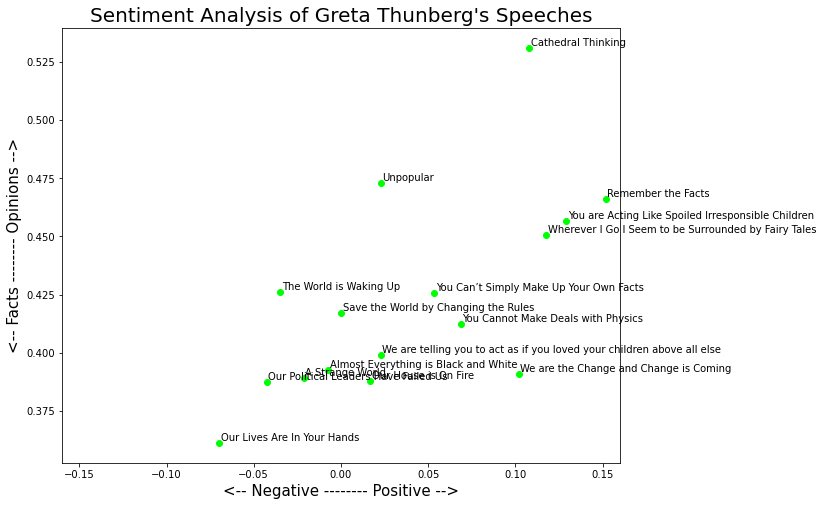

In [71]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, greta in enumerate(sentiment_analysis.index):
    x = sentiment_analysis.polarity.loc[greta]
    y = sentiment_analysis.subjectivity.loc[greta]
    plt.scatter(x, y, color='lime')
    plt.text(x+.001, y+.001, sentiment_analysis['Title'][index], fontsize=10)
    plt.xlim(-.16, .16) 
    
plt.title("Sentiment Analysis of Greta Thunberg's Speeches", fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

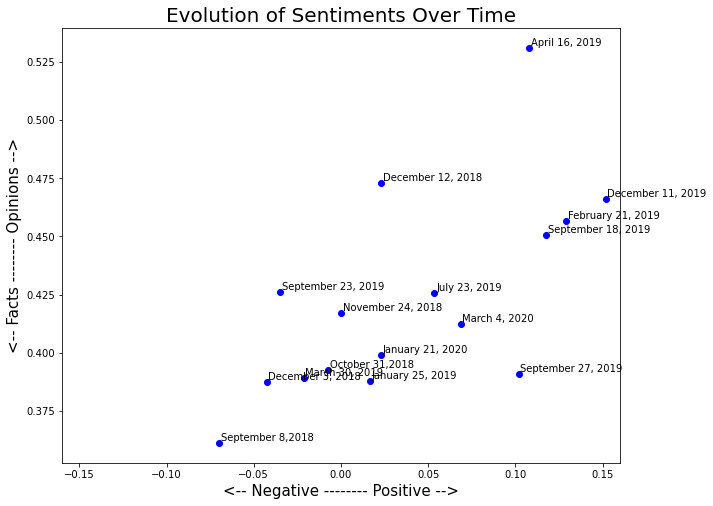

In [72]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, greta in enumerate(sentiment_analysis.index):
    x = sentiment_analysis.polarity.loc[greta]
    y = sentiment_analysis.subjectivity.loc[greta]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, sentiment_analysis['Date'][index], fontsize=10)
    plt.xlim(-.16, .16) 
    
plt.title("Evolution of Sentiments Over Time", fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.

In [73]:
import numpy as np
import math

def split_text(text, n=10):
    
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [74]:
sentiment_analysis

,Title,Event,Location,Date,Script_lemmatized,polarity,subjectivity
0,Our Lives Are In Your Hands,Climate Strike Concert,Stockholm,"September 8,2018","['last', 'summer', 'climate', 'scientist', 'jo...",-0.069924,0.361176
1,Almost Everything is Black and White,Extinction Rebellion Rally,London,"October 31,2018","['eight', 'year', 'old', 'first', 'heard', 'so...",-0.007532,0.392601
2,Save the World by Changing the Rules,School strike for climate,Stockholm,"November 24, 2018","['eight', 'year', 'old', 'first', 'heard', 'so...",-0.000070,0.416883
3,Our Political Leaders Have Failed Us,UN Climate Conference,Katowice,"December 3, 2018","['start', 'want', 'thank', 'antonio', 'guterre...",-0.042674,0.387317
4,Unpopular,COP24 Speech,Katowice,"December 12, 2018","['name', 'greta', 'thunberg', 'year', 'old', '...",0.022873,0.473077
5,Our House is On Fire,World Economic Forum,Davos,"January 25, 2019","['house', 'fire', 'house', 'fire', 'according'...",0.016648,0.388025
6,You are Acting Like Spoiled Irresponsible Chil...,European Economic and Social Committee,Brussels,"February 21, 2019","['name', 'greta', 'thunberg', 'climate', 'acti...",0.129251,0.456573
7,A Strange World,Goldene Kamera,Berlin,"March 30, 2019","['thank', 'want', 'dedicate', 'prize', 'protec...",-0.021376,0.389286
8,Cathedral Thinking,European Parliament,Strasbourg,"April 16, 2019","['name', 'greta', 'thunberg', 'year', 'old', '...",0.107713,0.531115
9,You Can’t Simply Make Up Your Own Facts,Frech National Assembly,Paris,"July 23, 2019","['je', 'mappelle', 'greta', 'thunber', 'merci'...",0.053542,0.425708


In [75]:
list_pieces = []
for t in sentiment_analysis.Script_lemmatized:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[["['last', 'summer', 'climate', 'scientist', 'johan', 'rockström', 'people', 'wrote', 'three', 'year', 'reverse', 'growth', 'greenhousegas', 'emission', 'going', 'reach', 'goal', 'set', 'paris', 'agreement', 'year', 'two', 'month', 'passed', 'time', 'ma",
  "ny', 'scientist', 'said', 'thing', 'lot', 'thing', 'got', 'worse', 'greenhousegas', 'emission', 'continue', 'increase', 'maybe', 'le', 'time', 'year', 'ten', 'month', 'johan', 'rockström', 'said', 'left', 'people', 'knew', 'need', 'ask', 'passionate',",
  " 'climate', 'change', 'people', 'knew', 'scientist', 'five', 'percent', 'chance', 'meeting', 'paris', 'target', 'people', 'knew', 'nightmare', 'scenario', 'face', 'keep', 'global', 'warming', 'c', 'need', 'ask', 'school', 'strike', 'outside', 'parliam",
  "ent', 'everyone', 'knew', 'serious', 'situation', 'little', 'actually', 'done', 'everyone', 'would', 'come', 'sit', 'beside', 'u', 'sweden', 'live', 'life', 'resource', 'planet', 'carbon', 'footprint', 'ten', 'worst', 'world',

In [76]:
len(list_pieces)

16

In [77]:
len(list_pieces[0])

10

In [78]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.0,
  -0.1125,
  0.0,
  -0.2424242424242424,
  0.07714285714285714,
  -0.03428571428571429,
  -0.09999999999999999,
  -0.15000000000000002,
  -0.0375,
  0.07714285714285714],
 [0.11499999999999999,
  -0.17333333333333328,
  0.003703703703703715,
  -0.15625,
  -0.04413265306122449,
  0.09166666666666667,
  -0.16623376623376623,
  0.1598639455782313,
  0.021875000000000006,
  -0.25],
 [0.11499999999999999,
  -0.1304487179487179,
  0.09583333333333333,
  -0.011527777777777781,
  -0.030059523809523814,
  -0.07916666666666666,
  0.047474747474747475,
  0.08163265306122448,
  -0.06874999999999999,
  -0.028831168831168826],
 [0.05000000000000001,
  -0.13333333333333333,
  0.037500000000000006,
  -0.25436507936507935,
  0.03250000000000001,
  0.0,
  0.0,
  0.021875000000000006,
  -0.07142857142857142,
  -0.09999999999999999],
 [0.11666666666666665,
  0.1625,
  -0.21999999999999997,
  0.13125,
  -0.125,
  0.3371212121212121,
  0.25,
  0.0,
  -0.6666666666666666,
  -0.033333333333333326],
 [0

# Analysis of the polarity of each of greta thunberg's speeches, splits into 10 equal parts.

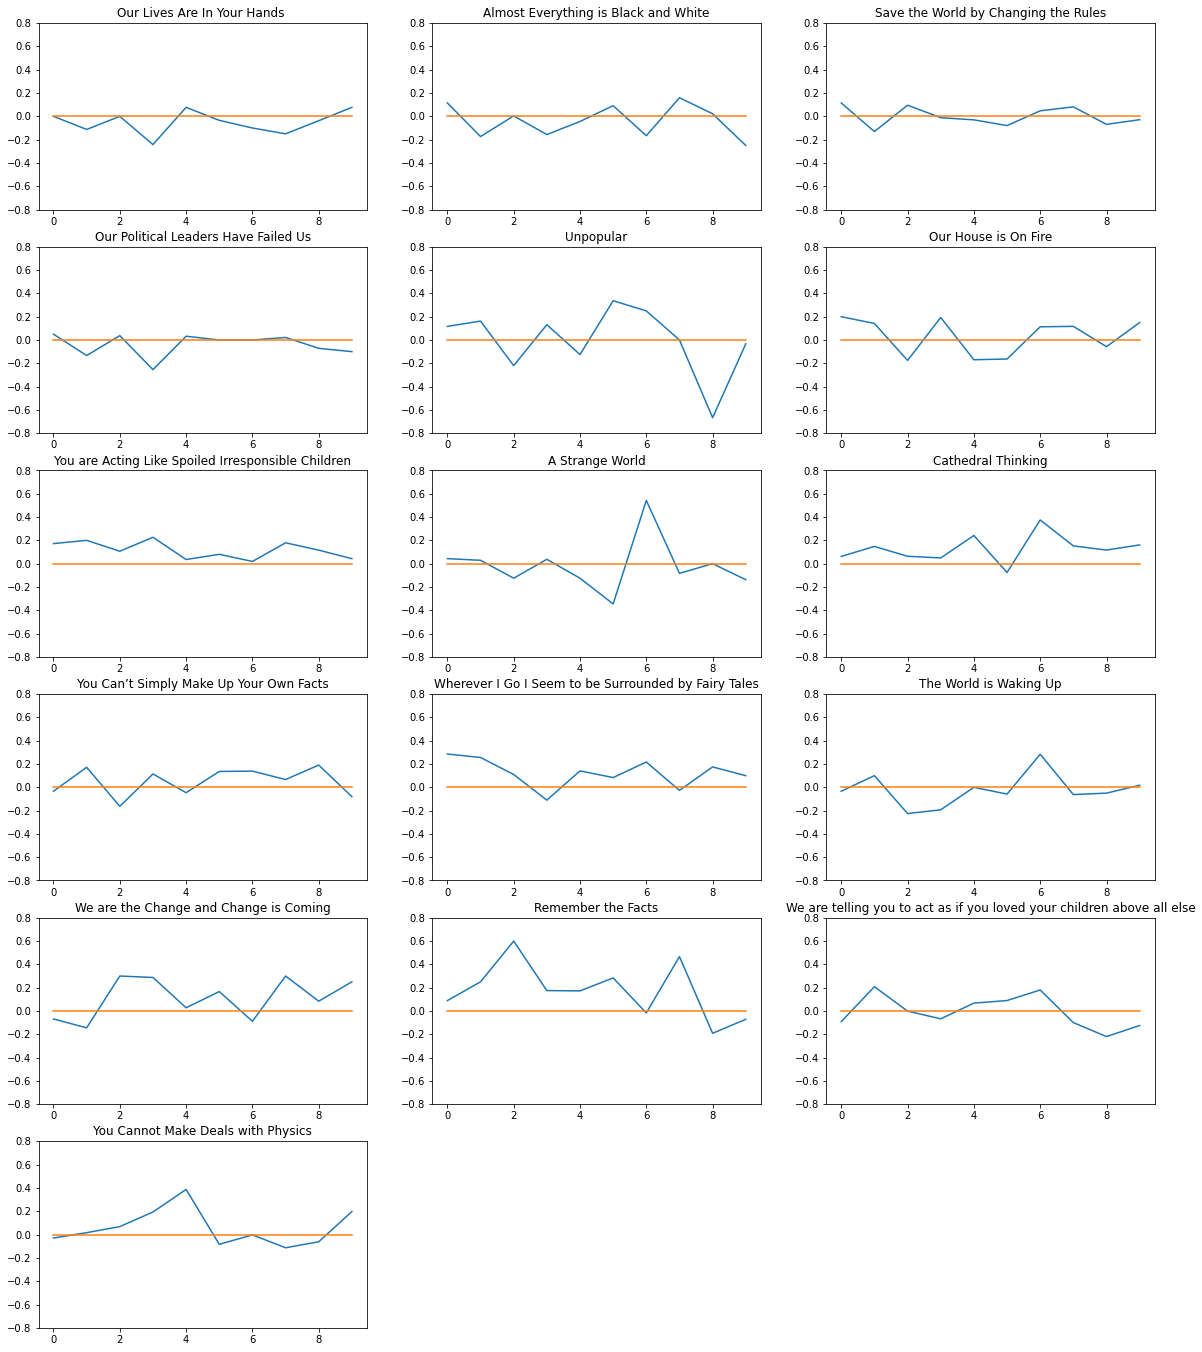

In [88]:
plt.rcParams['figure.figsize'] = [20, 24]

for index, greta in enumerate(sentiment_analysis.index):    
    plt.subplot(6, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(sentiment_analysis['Title'][index])
    plt.ylim(ymin=-.8, ymax=.8)
    
plt.show()